In [2]:
import config as c
import utils as u

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper")
%load_ext autoreload
%autoreload 2

TODO- determine n days training at switch for each one of these- more rig switches could be due to more time training and things breaking.

- R046- moved due to speaker breaking on aug 3rd after 4 days in grow fix

  - not concerning of an effect

- R048- moved to left port breaking on aug 28th after 20 days in grow fix

  - does get kinda better after rig shift but it takes at least a week to grow out of max, not too concerning

- R052- moved due to low trial counts on sep 28th after 32 days in grow fix, rather than being mid 3s, were low to mid 2s sometimes 1s

  - did succeed after rig switch, maybe due to it

- R054- moved due to cpoking not happening on aug 13th after 5 days of < 10 trials at the start of cpoke growth

  - not concerning of an effect

- R056- moved due to rig freezing occasionally in later sessions after 32 days
  - not concerning of an effect


# 0. Load Data


In [3]:
tdf = u.load_trials_df(stages="all")
tdf["date"] = apd.to_datetime(tdf["date"])
ddf = u.load_days_df(stages="all")

Loading trials data from directory: /Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/fixation_publication
Loading days data from directory: /Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/fixation_publication


In [5]:
trial_rig_df = pd.merge(
    tdf,
    ddf[["animal_id", "stage", "date", "rigid"]],
    on=["animal_id", "stage", "date"],
)
trial_rig_df = u.compute_days_relative_to_stage(trial_rig_df, stage=5)

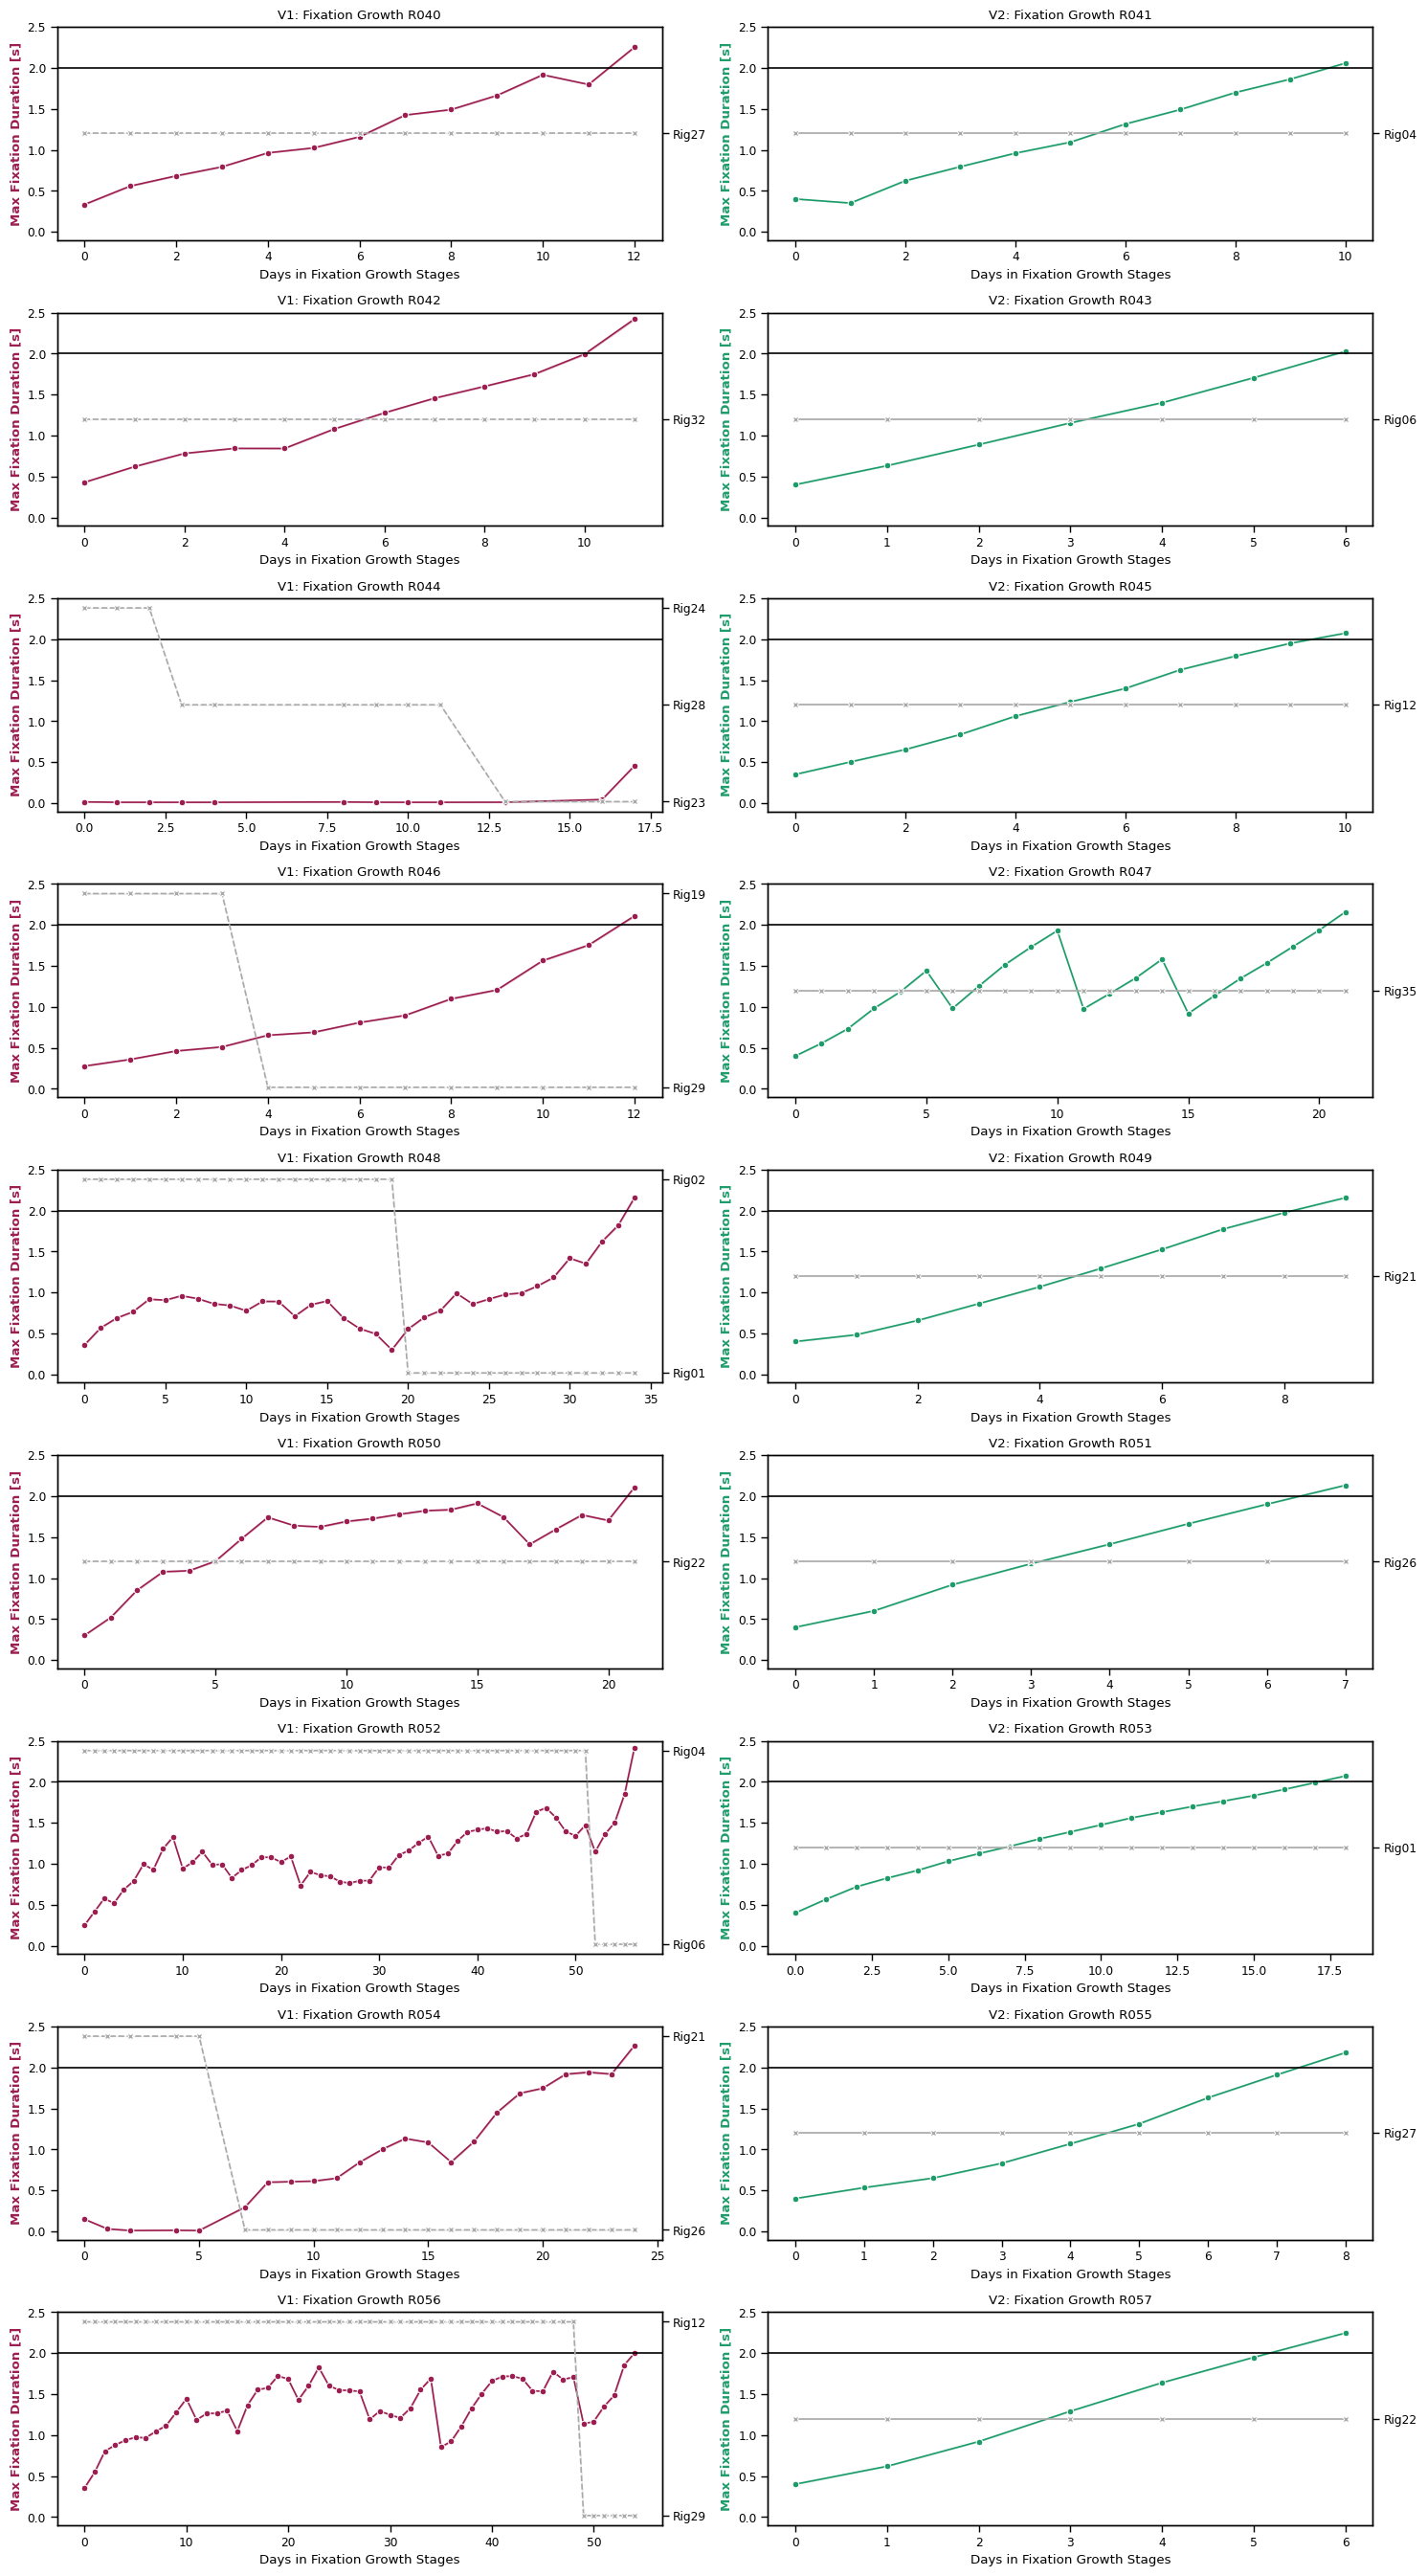

In [28]:
# Number of rows (animals) and columns (groups).
n_rows = len(c.V1_ANIMALS)  # assuming both lists are of equal length
n_cols = 2

# Create a figure and axes grid.
fig, axs = plt.subplots(
    n_rows,
    n_cols,
    figsize=(15, 3 * n_rows),
    sharex=False,
)

# Loop through V1 animals and plot in the first column.
for row, animal in enumerate(c.V1_ANIMALS):
    # Query the DataFrame for the current animal.
    df = trial_rig_df.query("stage > 4 and stage < 8 and animal_id == @animal")

    ax = axs[row, 0]
    sns.lineplot(
        data=df,
        x="days_relative_to_stage_5",
        y="fixation_dur",
        estimator="max",
        ax=ax,
        marker="o",
        color=c.V1_COLOR,
    )
    ax.axhline(y=2, color="k")
    ax.set(
        title=f"V1: Fixation Growth {animal}",
        ylim=(-0.1, 2.5),
        xlabel="Days in Fixation Growth Stages",
    )
    ax.set_ylabel("Max Fixation Duration [s]", color=c.V1_COLOR, weight="semibold")

    # Create a secondary y-axis for the 'rigid' plot.
    ax2 = ax.twinx()
    sns.lineplot(
        data=df,
        x="days_relative_to_stage_5",
        y="rigid",
        color="darkgray",
        ax=ax2,
        marker="X",
        linestyle="--",
    )
    ax2.set(ylabel="")

# Loop through V2 animals and plot in the second column.
for row, animal in enumerate(c.V2_ANIMALS):
    df = trial_rig_df.query("stage > 4 and stage < 8 and animal_id == @animal")

    ax = axs[row, 1]
    sns.lineplot(
        data=df,
        x="days_relative_to_stage_5",
        y="fixation_dur",
        estimator="max",
        ax=ax,
        marker="o",
        color=c.V2_COLOR,
    )
    ax.axhline(y=2, color="k")
    ax.set(
        title=f"V2: Fixation Growth {animal}",
        ylim=(-0.1, 2.5),
        xlabel="Days in Fixation Growth Stages",
    )
    ax.set_ylabel("Max Fixation Duration [s]", color=c.V2_COLOR, weight="semibold")

    ax2 = ax.twinx()
    sns.lineplot(
        data=df,
        x="days_relative_to_stage_5",
        y="rigid",
        color="darkgray",
        ax=ax2,
        marker="X",
    )
    ax2.set_ylabel("")

plt.tight_layout()
plt.show()

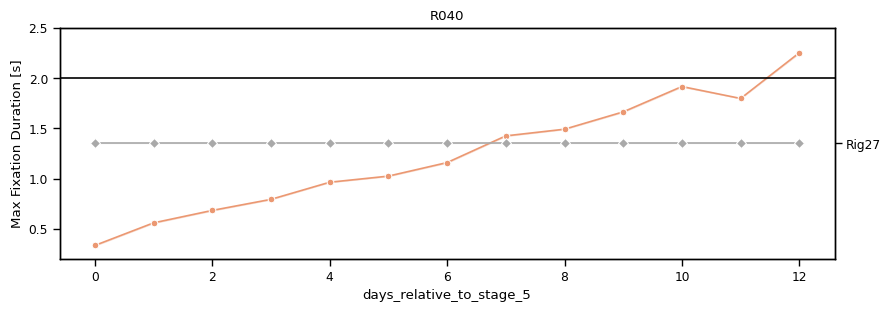

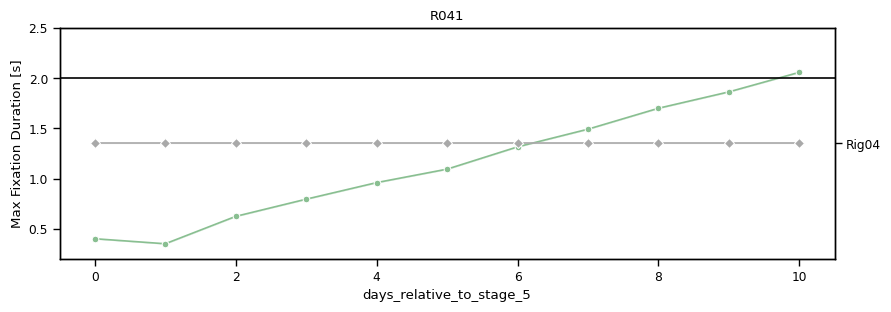

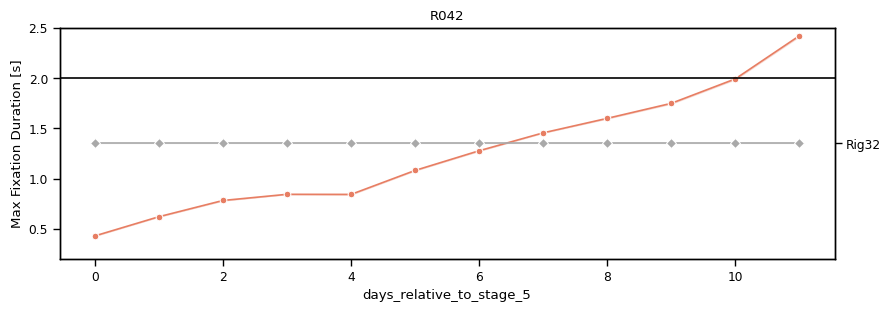

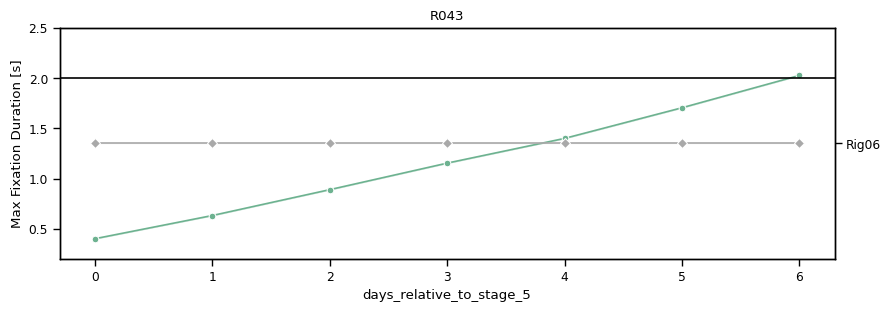

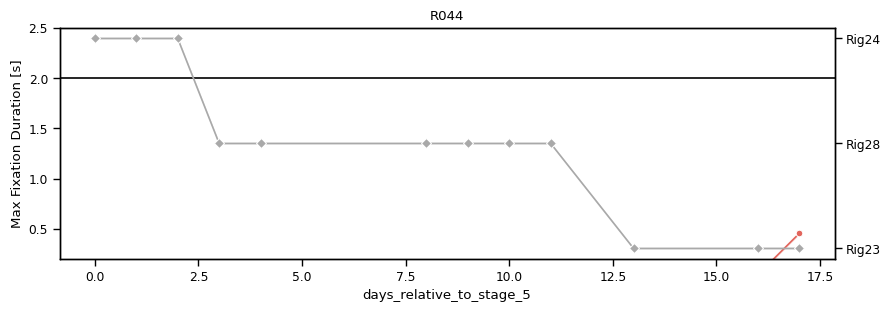

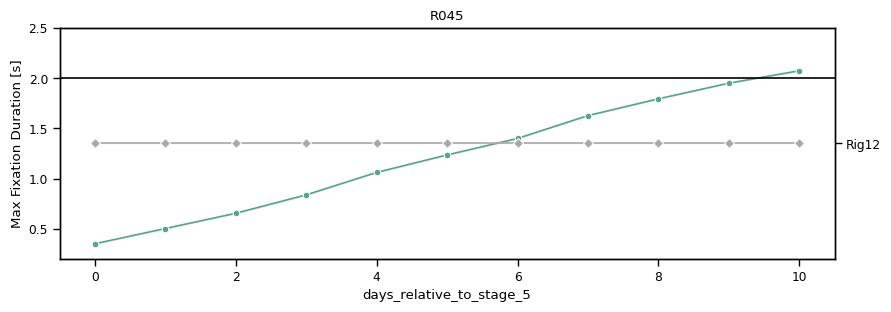

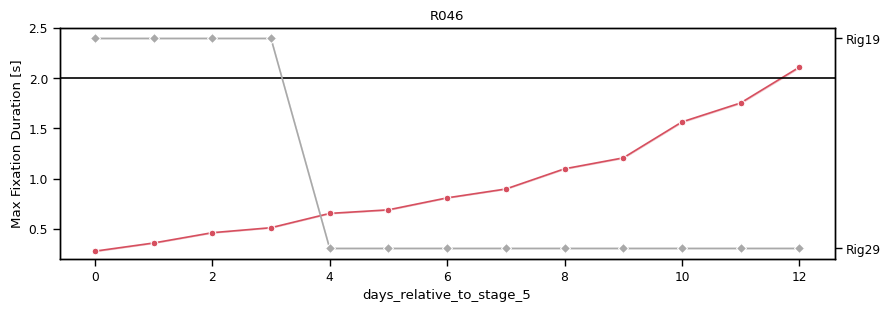

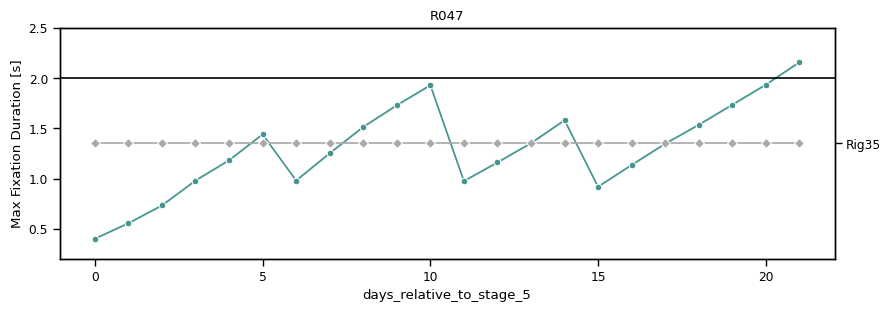

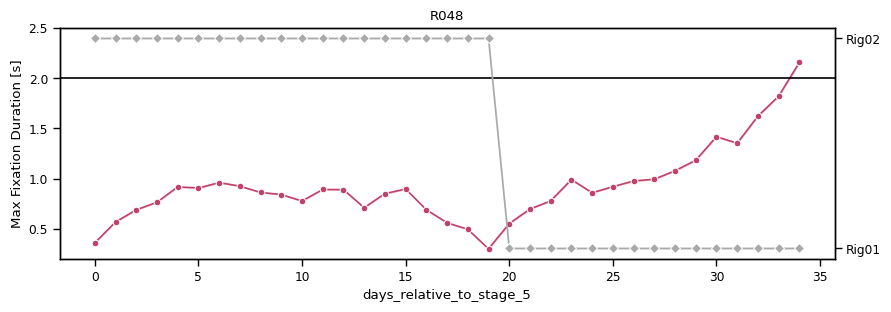

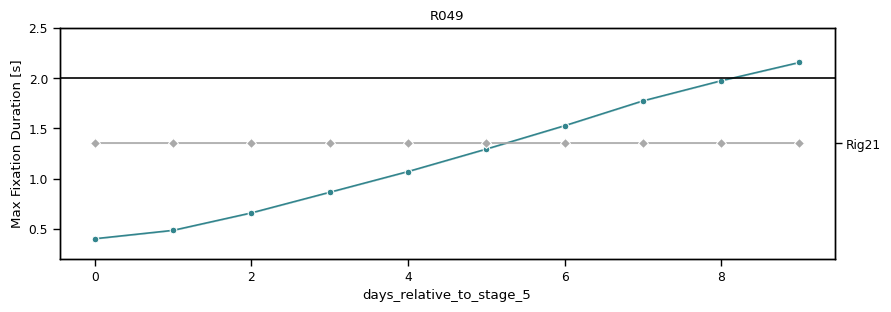

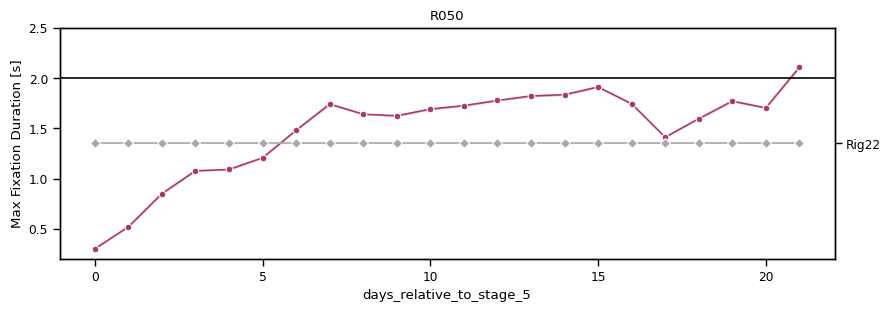

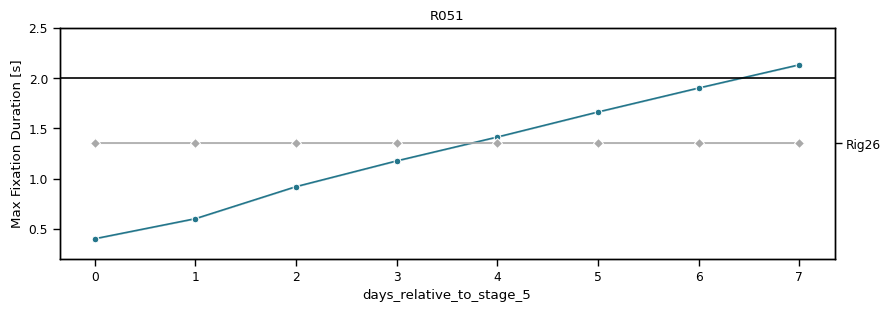

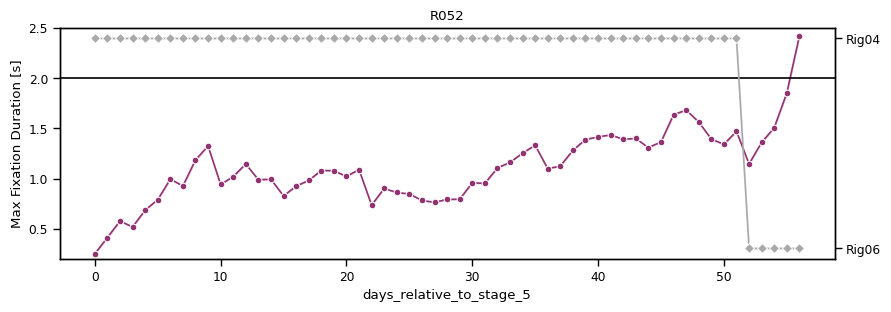

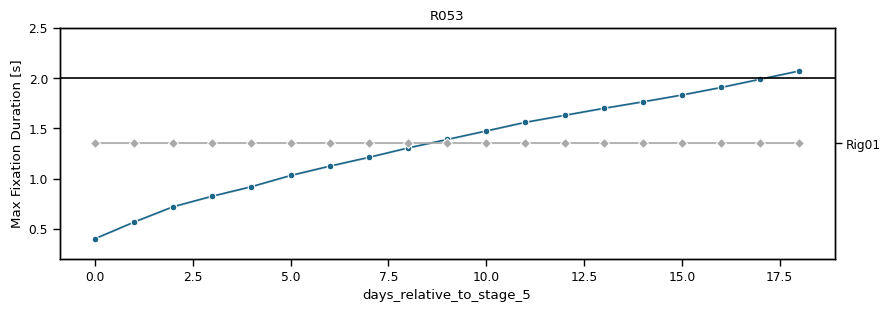

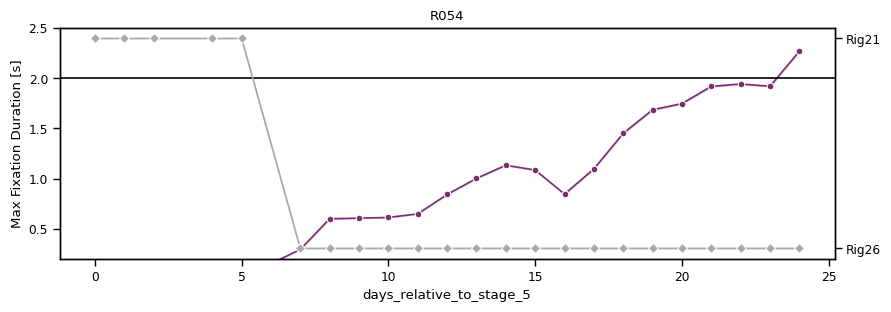

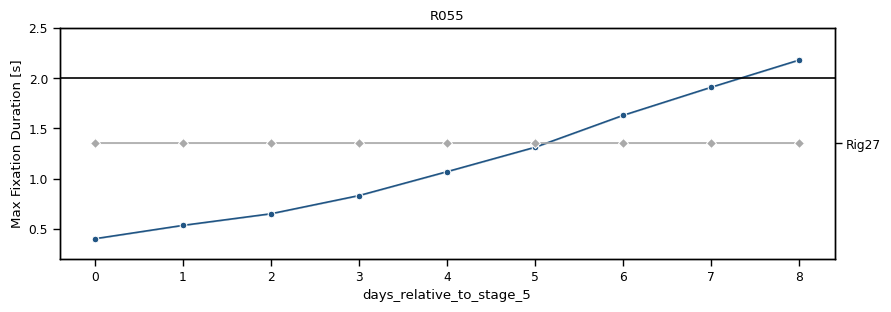

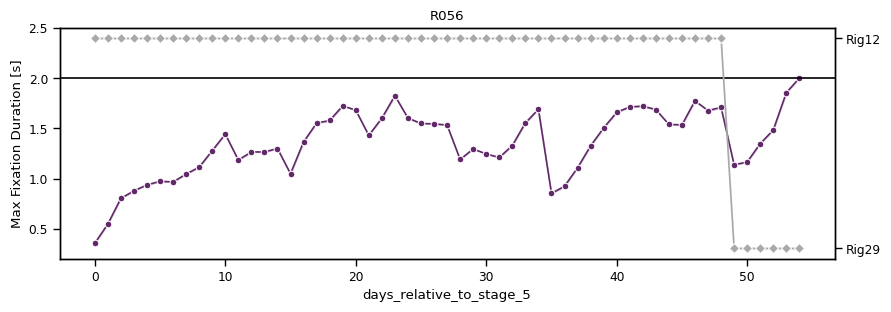

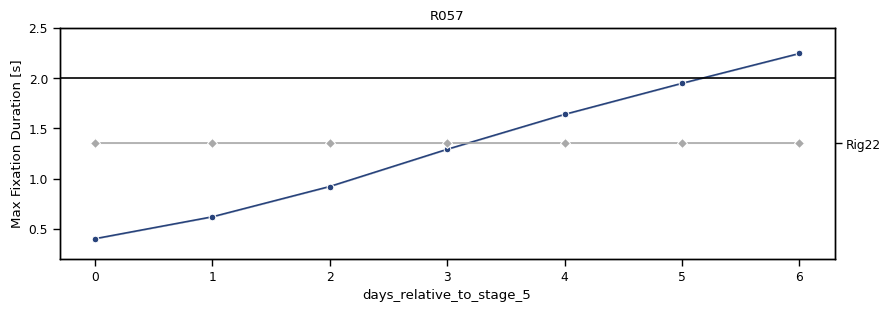

In [6]:
for aid, df in trial_rig_df.query("stage > 4 and stage <8").groupby("animal_id"):
    fig, ax = plt.subplots(figsize=(10, 3))
    sns.lineplot(
        data=df,
        x="days_relative_to_stage_5",
        y="fixation_dur",
        estimator="max",
        ax=ax,
        marker="o",
        color=c.ANIMAL_PALETTE[aid],
    )
    ax.axhline(y=2, color="k")
    ax.set(title=f"{str(aid)}", ylabel="Max Fixation Duration [s]", ylim=(0.2, 2.5))

    ax2 = ax.twinx()
    sns.lineplot(
        data=df,
        x="days_relative_to_stage_5",
        y="rigid",
        color="darkgray",
        ax=ax2,
        marker="D",
    )
    ax2.set(ylabel="")